In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

In [4]:
state_df = gpd.read_file(
    "https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip"
)
county_df = gpd.read_file(
    "https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip"
)

In [5]:
county_df = county_df.query("STATEFP == '55'")
results = pd.read_csv(
    "https://datascience.quantecon.org/assets/data/ruhl_cleaned_results.csv",
    thousands=",",
)
results.head()
results["county"] = results["county"].str.title()
results["county"] = results["county"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()
res_w_states = county_df.merge(results, left_on="NAME", right_on="county", how="inner")
res_w_states["trump_share"] = res_w_states["trump"] / (res_w_states["total"])
res_w_states["rel_trump_share"] = res_w_states["trump"] / (
    res_w_states["trump"] + res_w_states["clinton"]
)
res_w_states.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton,trump_share,rel_trump_share
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340,0.424007,0.460441
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503,0.567473,0.596800
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641,0.495016,0.522615
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529,0.448444,0.482921
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451,0.621153,0.657299


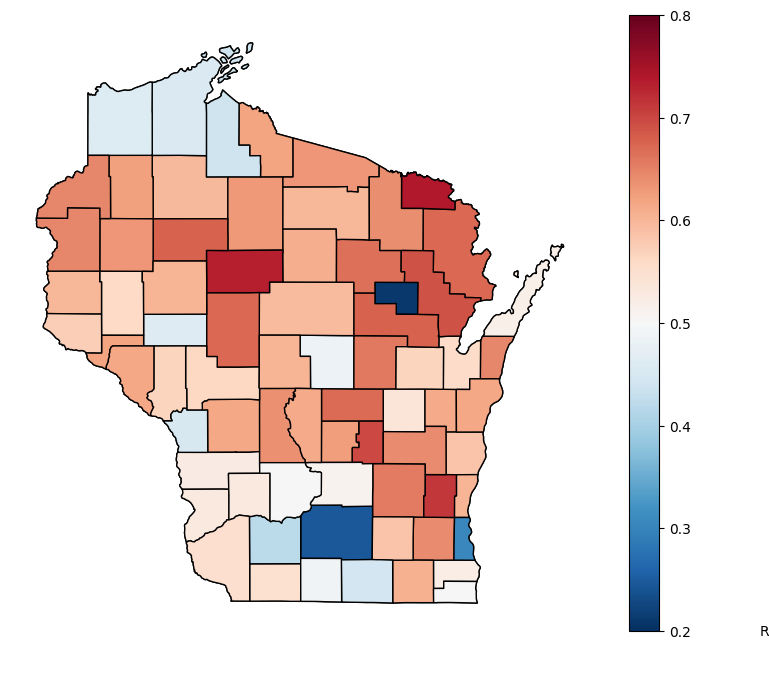

In [6]:
fig, gax = plt.subplots(figsize=(10, 8))

# Plot the state
state_df[state_df["NAME"] == "Wisconsin"].plot(ax=gax, edgecolor="black", color="white")

# Plot the counties and pass 'rel_trump_share' as the data to color
res_w_states.plot(
    ax=gax,
    edgecolor="black",
    column="rel_trump_share",
    legend=True,
    cmap="RdBu_r",
    vmin=0.2,
    vmax=0.8,
)

# Add text to let people know what we are plotting
gax.annotate("Republican vote share", xy=(0.76, 0.06), xycoords="figure fraction")

# I don't want the axis with long and lat
plt.axis("off")

plt.show()

In [7]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer

output_notebook()
import json

res_w_states["clinton_share"] = res_w_states["clinton"] / res_w_states["total"]
# Convert data to geojson for bokeh
wi_geojson = GeoJSONDataSource(geojson=res_w_states.to_json())

color_mapper = LinearColorMapper(palette=brewer["RdBu"][10], low=0, high=1)
color_bar = ColorBar(
    color_mapper=color_mapper,
    label_standoff=8,
    width=500,
    height=20,
    border_line_color=None,
    location=(0, 0),
    orientation="horizontal",
)
hover = HoverTool(
    tooltips=[
        ("County", "@county"),
        ("Portion Trump", "@trump_share"),
        ("Portion Clinton", "@clinton_share"),
        ("Total", "@total"),
    ]
)
p = figure(title="Wisconsin Voting in 2016 Presidential Election", tools=[hover])
p.patches(
    "xs",
    "ys",
    source=wi_geojson,
    fill_color={"field": "rel_trump_share", "transform": color_mapper},
)
p.add_layout(color_bar, "below")
show(p)

Loading BokehJS ...